### Criando um sistema classificador de músicas entre ritmos agitados e lentos 🎶🎵

#### Importando a base de dado 🎲

In [ ]:
import pandas as pd

# Configuração para visualizar todas as colunas da tabela
pd.set_option('display.max_columns', None)

tabela = pd.read_csv('BasesDeDados/dataset.csv')

tabela.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
# verificando a quantidade de linhas e colunas, os tipos de dados das colunas e se há registros nulos ou vazios

display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

None

#### Criando a variável target 🎯

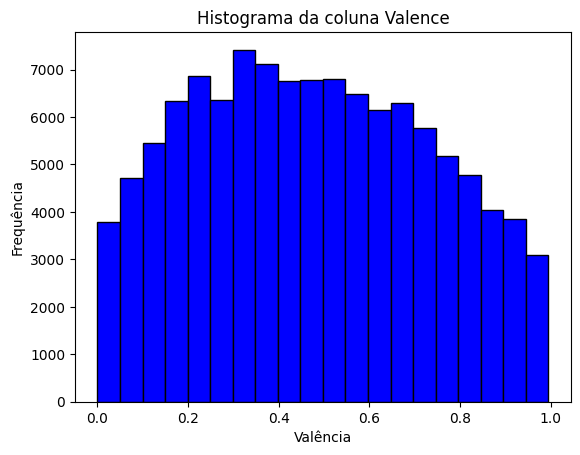

In [ ]:
# !pip install matplotlib

# Analisando como a valência está distribuída

import matplotlib.pyplot as plt

plt.hist(tabela['valence'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Valência')
plt.ylabel('Frequência')
plt.title('Histograma da coluna Valence')

plt.show()

In [ ]:
# Fazendo a análise descritiva da variável target

tabela['valence'].describe()

count    114000.000000
mean          0.474068
std           0.259261
min           0.000000
25%           0.260000
50%           0.464000
75%           0.683000
max           0.995000
Name: valence, dtype: float64

In [5]:
# Criando a coluna target

def categorizar_valence(row):
    if row['valence'] > 0.5:
        return 'agitada'
    else:
        return 'lenta'
    

tabela['target'] = tabela.apply(categorizar_valence, axis=1)

tabela.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


#### Feature Engineering 🛠️

In [ ]:
# Analisando quais colunas serão usadas para treinar o modelo

tabela.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'target'],
      dtype='object')

In [7]:
# Removendo colunas desnecessárias para a análise

tabela_musica = tabela.drop(['Unnamed: 0', 'track_id'], axis=1)
tabela_musica.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


#### Tratando os dados categóricos 🔤

In [ ]:
# Utilizando a técnica "Label Encoder" para tratar os dados categóricos

def label_encoder_dataframe(df, columns_to_encode):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()

    for column in columns_to_encode:
        if column in df.columns:
            df[column] = le.fit_transform(df[column])
        else:
            print('A lista possui colunas que não existem no DataFrame')

    return df

# Selecionando as colunas categóricas
colunas_a_codificar = ['artists', 'album_name', 'track_name', 'explicit', 'track_genre', 'target']

label_encoder_dataframe(tabela_musica, colunas_a_codificar)

tabela_musica.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,10357,8100,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,0
1,3287,14796,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,1
2,12397,39162,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,1
3,14839,8580,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,1
4,5255,16899,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,1


### Analisando as variáveis que vão compor o modelo 📊

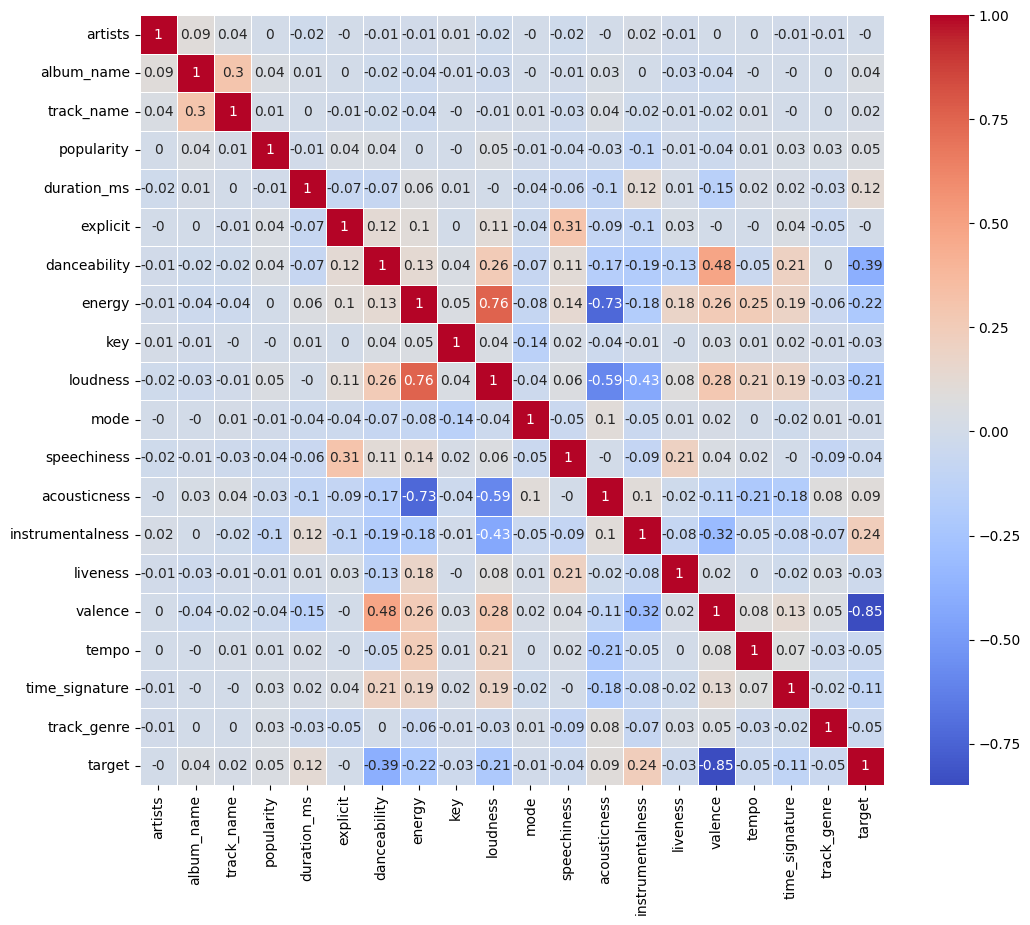

In [ ]:
# Analisando a correlação dos dados

import seaborn as sns

correlacion_matrix = tabela_musica.corr().round(2)

# Criando gráfico de correlação

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data=correlacion_matrix, annot=True, linewidths=.5, ax=ax, cmap='coolwarm')

plt.show()

#### Entendendo o equilíbrio da target 🎯

In [ ]:
# Verificando o equilíbrio das classes

round(tabela_musica['target'].value_counts(normalize=True)*100, 2)

target
1    54.37
0    45.63
Name: proportion, dtype: float64

#### Separando os dados em treino e teste 🔄️

In [ ]:
# Separando os dados em treino e teste (método hold out)
# Utilizarei apenas algumas colunas para criar o modelo

from sklearn.model_selection import train_test_split

X = tabela_musica[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'track_genre']]
y = tabela_musica['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
print(X_train.shape, X_test.shape)

(91200, 9) (22800, 9)


#### Normalizando os dados 📏

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Criando uma instância do MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_escalonado = scaler.transform(X_train)
X_test_escalonado = scaler.transform(X_test)

#### Criando uma função para avaliar os modelos

In [18]:
def roda_modelo(modelo):

    from sklearn.metrics import roc_curve, roc_auc_score, classification_report

    # Treinando o modelo com os dados de treino
    modelo.fit(X_train_escalonado, y_train)

    # Calculando a probabilidade e o AUC
    prob_predic = modelo.predict_proba(X_test_escalonado) # Obter as probabilidades associadas às classes previstas para cada
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    # Fazendo a predição dos dados de teste e calculando o classification report
    predicao = modelo.predict(X_test_escalonado)
    print('\nClassification Report')
    print(classification_report(y_test, predicao))

    print('\nRoc Curve\n')

    # Fazendo previsões de probabilidade
    y_pred_probs = modelo.predict_proba(X_test_escalonado)[:,1]

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    # Calcular a AUC (Área sob a curva ROC)
    auc = roc_auc_score(y_test, y_pred_probs)

    # Plotar a curva ROC
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0,1], [0,1], color='gray', linestyle='--')
    plt.xlabel('Taxa de falso positivo')
    plt.ylabel('Taxa de verdadeiro positivo')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Converter probabilidades em classes preditas (0 ou 1)
    y_pred = (y_pred_probs > 0.5).astype(int)

### Treinando e avaliando o melhor modelo 🤖🏆 

#### Regressão logística

AUC 0.7949172507037146

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     10403
           1       0.74      0.75      0.74     12397

    accuracy                           0.72     22800
   macro avg       0.72      0.72      0.72     22800
weighted avg       0.72      0.72      0.72     22800


Roc Curve



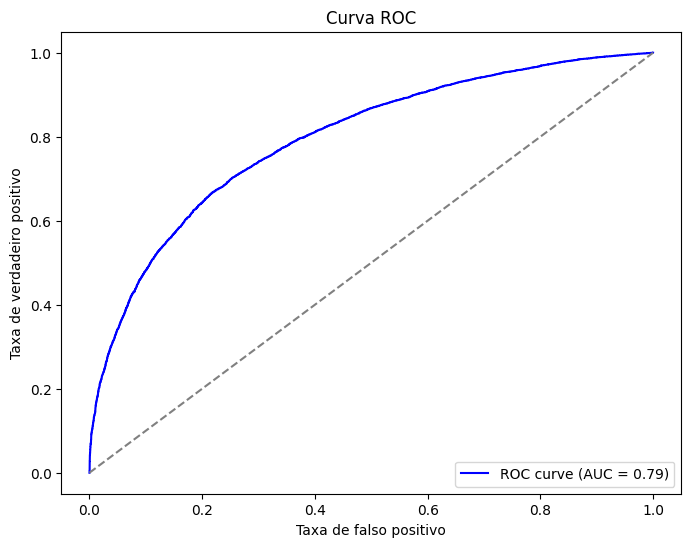

In [21]:
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)

#### KNN (K-Nearest neighbors)

AUC 0.8124733674942257

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     10403
           1       0.76      0.78      0.77     12397

    accuracy                           0.75     22800
   macro avg       0.75      0.75      0.75     22800
weighted avg       0.75      0.75      0.75     22800


Roc Curve



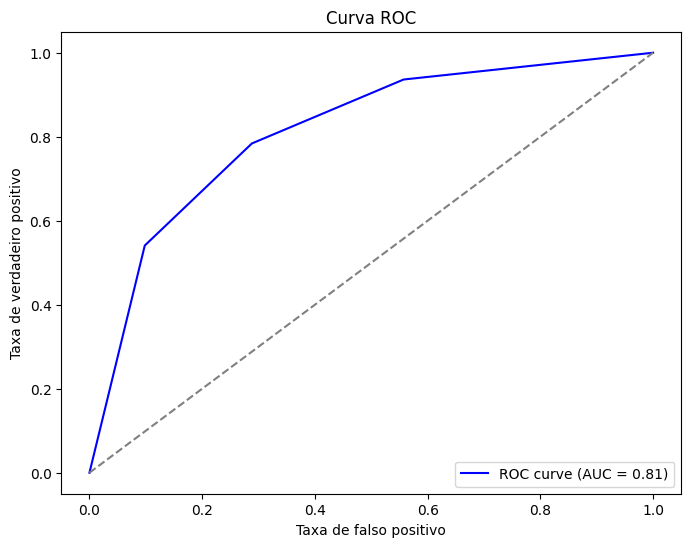

In [22]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=3)
roda_modelo(modelo_knn)

#### Random Forest

AUC 0.8265111381185757

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     10403
           1       0.76      0.77      0.76     12397

    accuracy                           0.74     22800
   macro avg       0.74      0.74      0.74     22800
weighted avg       0.74      0.74      0.74     22800


Roc Curve



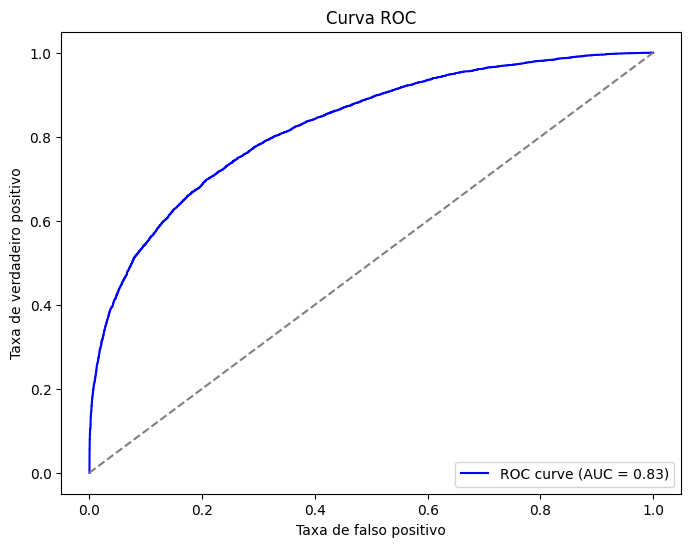

In [23]:
from sklearn.ensemble import RandomForestClassifier

modelo_random_florest = RandomForestClassifier(max_depth=7, n_estimators=100)
roda_modelo(modelo_random_florest)

#### Testando novos parâmetro com Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definindo os parâmetro a serem testados
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)

# Ajustando o modelo ao conjunto de dados
grid_search.fit(X_train_escalonado, y_train)

rf_params = grid_search.best_params_
print("Melhores hiperparâmetros:", rf_params)

Melhores hiperparâmetros: {'max_depth': 15, 'n_estimators': 200}


Testando o Random Forest com os melhores parâmetro encontrados

AUC 0.9023503490931963

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     10403
           1       0.83      0.84      0.83     12397

    accuracy                           0.82     22800
   macro avg       0.82      0.82      0.82     22800
weighted avg       0.82      0.82      0.82     22800


Roc Curve



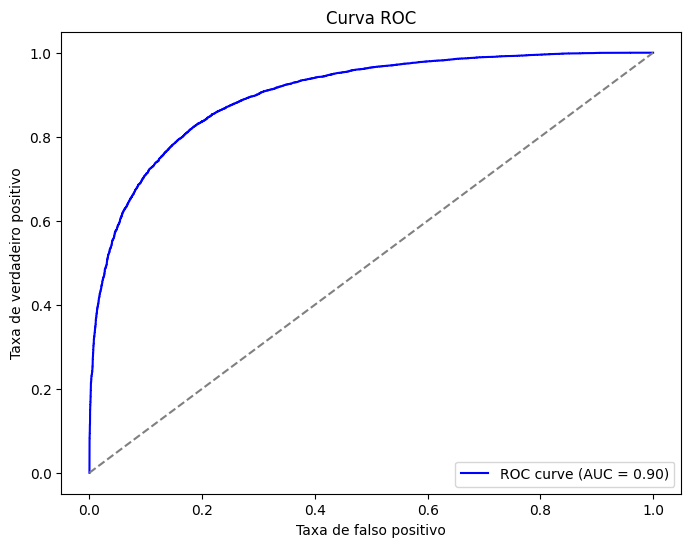

In [26]:
from sklearn.ensemble import RandomForestClassifier

modelo_random_florest_gs = RandomForestClassifier(max_depth=15, n_estimators=300)
roda_modelo(modelo_random_florest_gs)

#### Aplicando o modelo em novos dados

In [27]:
# %pip install openpyxl
import numpy as np

novos_dados = pd.read_excel('BasesDeDados/novos_dados.xlsx')
base_original = pd.read_excel('BasesDeDados/novos_dados.xlsx')

#Criando a pipeline
coluna = ['track_genre']
label_encoder_dataframe(novos_dados, coluna)
novos_dados = scaler.transform(novos_dados)

# Realize a previsão usando o modelo Random Forest treinado
previsoes = modelo_random_florest_gs.predict(novos_dados)

# Obtendo o predict
def mapear_valor(valores):
    resultados = []
    for valor in valores:
        if valor == 0:
            resultados.append('Música agitada')
        elif valor == 1:
            resultados.append('Música lenta')
        else:
            resultados.append('Desconhecido')
    return np.array(resultados)

base_original['target'] = mapear_valor(previsoes)
base_original.head()

,popularity,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,liveness,track_genre,target
0,80,200000,0.89,0.8,-19333,0.0555,0.976,0.45,rock,Música agitada
1,30,205000,0.20,0.5,-11773,0.0100,0.452,0.20,folk,Música lenta
